In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("/content/drive/MyDrive/deep learning/Churn_Modelling.csv")

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.shape

(10000, 14)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [66]:
df.duplicated().sum()

0

In [67]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [68]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [69]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [70]:
df.groupby("Gender")["Exited"].count()

,Exited
Gender,
Female,4543
Male,5457


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

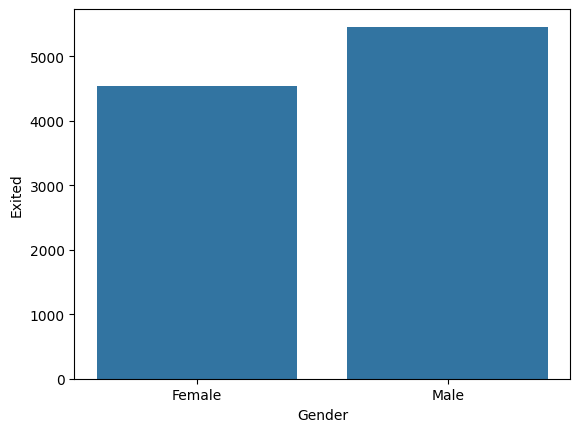

In [72]:
sns.barplot(df.groupby("Gender")["Exited"].count())
plt.plot()

In [73]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
tenure = df["Tenure"].value_counts().reset_index()
tenure

,Tenure,count
0,2,1048
1,1,1035
2,7,1028
3,8,1025
4,5,1012
5,3,1009
6,4,989
7,9,984
8,6,967
9,10,490


In [76]:
import plotly.express as px

In [77]:
fig = px.bar(tenure, x = "Tenure", y= "count", text_auto=True, height=400, width=1000)
fig.show()

In [78]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
df1 = df.copy()

In [80]:
df = pd.get_dummies(df, columns = ["Geography", "Gender"], drop_first=True, dtype=int)

In [81]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [82]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [83]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [89]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [90]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [91]:
# setup the device agnostic code

import torch
from torch import nn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [92]:
# converting the data into tensors and then split the data

X_train_scaled = torch.from_numpy(X_train_scaled).type(torch.float)
X_test_scaled = torch.from_numpy(X_test_scaled).type(torch.float)
y_train = torch.from_numpy(np.array(y_train)).type(torch.float)
y_test = torch.from_numpy(np.array(y_test)).type(torch.float)

In [93]:
class CxChurn(nn.Module):

  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=11, out_features=16)
    self.layer2 = nn.Linear(in_features=16, out_features=16)
    self.layer3 = nn.Linear(in_features=16, out_features=8)
    self.layer4 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.layer1(self.relu(x))
    x = self.dropout(x)
    x = self.layer2(self.relu(x))
    x = self.dropout(x)
    x = self.layer3(self.relu(x))
    x = self.dropout(x)
    x = self.layer4(x)

    return x

model = CxChurn().to(device)
model

CxChurn(
  (layer1): Linear(in_features=11, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [94]:
# from torchsummary import summary

In [95]:
# summary(model, input_size=(16,11))

In [96]:
loss_fc = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [97]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train_scaled = X_train_scaled.to(device)
X_test_scaled = X_test_scaled.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 3000

for epoch in range(epochs):

  #training
  model.train()

  y_logits = model(X_train_scaled).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fc(y_logits, y_train)
  acc = accuracy_score(y_train.detach().cpu().numpy(), y_pred.detach().cpu().numpy())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model.eval()

  with torch.inference_mode():

    test_logits = model(X_test_scaled).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fc(test_logits, y_test)
    test_acc = accuracy_score(y_test.detach().cpu().numpy(), test_pred.detach().cpu().numpy())
    test_f1_score = f1_score(y_test.detach().cpu().numpy(), test_pred.detach().cpu().numpy())

    # print out what is happepnin....
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train_Loss: {loss: .5f} | Train_Acc: {acc: .2f}% | Test_loss: {test_loss: .5f} | Test_acc: {test_acc: .2f}% ")

Epoch: 0 | Train_Loss:  0.63716 | Train_Acc:  0.79% | Test_loss:  0.63287 | Test_acc:  0.80% 
Epoch: 100 | Train_Loss:  0.48314 | Train_Acc:  0.79% | Test_loss:  0.45532 | Test_acc:  0.80% 
Epoch: 200 | Train_Loss:  0.43947 | Train_Acc:  0.80% | Test_loss:  0.40588 | Test_acc:  0.82% 
Epoch: 300 | Train_Loss:  0.40669 | Train_Acc:  0.83% | Test_loss:  0.36733 | Test_acc:  0.85% 
Epoch: 400 | Train_Loss:  0.38548 | Train_Acc:  0.84% | Test_loss:  0.34644 | Test_acc:  0.86% 
Epoch: 500 | Train_Loss:  0.37673 | Train_Acc:  0.85% | Test_loss:  0.34073 | Test_acc:  0.85% 
Epoch: 600 | Train_Loss:  0.37195 | Train_Acc:  0.85% | Test_loss:  0.33767 | Test_acc:  0.86% 
Epoch: 700 | Train_Loss:  0.36730 | Train_Acc:  0.85% | Test_loss:  0.33647 | Test_acc:  0.86% 
Epoch: 800 | Train_Loss:  0.36395 | Train_Acc:  0.85% | Test_loss:  0.33480 | Test_acc:  0.86% 
Epoch: 900 | Train_Loss:  0.36042 | Train_Acc:  0.86% | Test_loss:  0.33388 | Test_acc:  0.86% 
Epoch: 1000 | Train_Loss:  0.35719 | Train

In [98]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1204,630,40,7,0.00,2,1,1,34453.17,0,0,0,0
5413,671,42,6,0.00,2,1,0,197202.48,0,0,0,0
1812,850,33,7,134678.13,1,1,0,113177.95,0,1,0,0


In [99]:
X_train_scaled.dtype

torch.float32

In [100]:
input_data = np.array([604, 47, 4, 118907.60, 1, 0, 1, 47777.15, 1, 0, 0])
# input_data = torch.tensor([ 0.3565, -0.6558,  0.3457, -1.2185,  0.8084,  0.6492,  0.9748,  1.3677,
#         -0.5795, -0.5764,  0.9132])

In [101]:
new_data = input_data.reshape(1, -1)

In [102]:
new_input = scaler.transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [103]:
input_data = torch.tensor(new_input, dtype=torch.float32)

In [104]:
model.eval()
with torch.inference_mode():
    output = model(input_data)
    probabilities = torch.sigmoid(output)
    prediction = (probabilities >= 0.5).float()

In [105]:
print("output: ", output)
print("probability: ", probabilities)
print("Prediction:", prediction)

output:  tensor([[1.5299]])
probability:  tensor([[0.8220]])
Prediction: tensor([[1.]])


In [106]:
# Create a custom message based on the probability
if probabilities >= 0.75:
    justification = "The model is highly confident that the customer will churn."
elif probabilities >= 0.55:
    justification = "The model suggests the customer is likely to churn, but there is some uncertainty."
elif probabilities >= 0.45:
    justification = "The model indicates uncertainty; the customer might churn or stay."
else:
    justification = "The model is confident that the customer is unlikely to churn."

# Print the results
print(f"Predicted Churn Class: {'Churn (Left)' if prediction == 1 else 'Not Churn (Not Left)'}")
print(f"Churn Probability: {probabilities.item():.4f}")
print(f"Justification: {justification}")

Predicted Churn Class: Churn (Left)
Churn Probability: 0.8220
Justification: The model is highly confident that the customer will churn.


In [107]:
import pickle

In [108]:
pickle.dump(df1, open("df1.pkl", "wb"))

In [109]:
# aa = pd.read_pickle('df.pkl')

In [110]:
# aa.head()

In [111]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [112]:
# # Saving
# torch.save(model.state_dict(), 'model_state_dict.pth')

# # Loading
# model = YourModelClass()  # Recreate the model architecture
# model.load_state_dict(torch.load('model_state_dict.pth'))
# model.eval()  # Set to evaluation mode

# # Making predictions
# input_data = torch.tensor([...])  # Replace with your input
# prediction = model(input_data)

In [113]:
torch.save(model.state_dict(), 'model_state_dict.pth')

In [114]:
torch.save(model, 'model.pth')

In [115]:
print("verison: ", torch.__version__)

verison:  2.5.0+cpu
